In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

warnings.simplefilter('ignore')

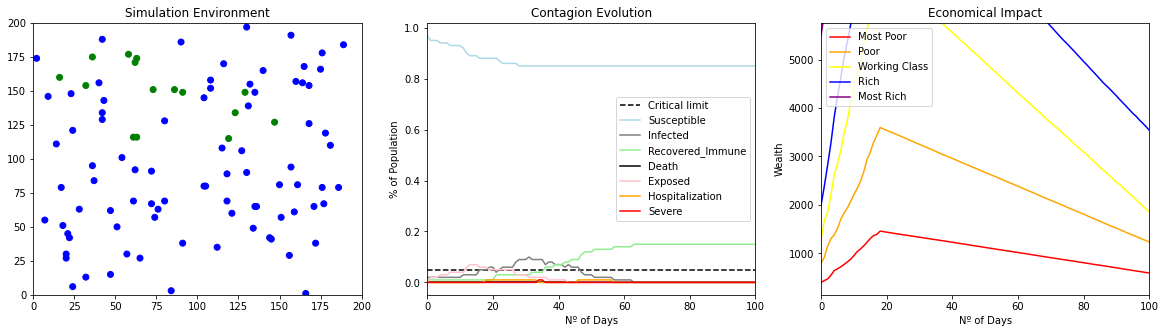

In [2]:
from covid_abs.abs import *
from covid_abs.graphics import *

sim = Simulation(
    # Percentage of infected in initial population
    initial_infected_perc = 0.02,
    # Percentage of immune in initial population
    initial_immune_perc = 0.01,
    # Length of simulation environment       
    length=200,                       
    # Height of simulation environment
    height=200,
    # Size of population
    population_size=100,
    # Minimal distance between agents for contagion
    contagion_distance=5.,                
    # Maximum percentage of population which Healthcare System can handle simutaneously
    critical_limit=0.05,
    # Mobility ranges for agents, by Status
    amplitudes = {                        
        Status.Susceptible : 10, 
        Status.Recovered_Immune : 10, 
        Status.Infected : 10 ,
        Status.Exposed : 10
        },
    contagion_rate= 0.5,
    age_hospitalization_probs =  [0.001, 0.003, 0.012, 0.032, 0.049, 0.102, 0.166, 0.243, 0.273],
)


sim.append_trigger_simulation(lambda a : a.get_iteration() >17 , 
                             'amplitudes',
                              lambda a : {                       
                                      Status.Susceptible : 0.5, 
                                      Status.Recovered_Immune : 0.5, 
                                      Status.Infected : 0.5 ,
                                      Status.Exposed : 0.5 
                             })

anim = execute_simulation(sim, iterations=100)

#rc('animation', html='jshtml')
rc('animation', html='html5')
anim


[[0, 'Susceptible', 0.95, 0.9659999999999997, 0.005291502622129186, 0.97], [0, 'Infected', 0.02, 0.022400000000000003, 0.004715930449020638, 0.04], [0, 'Recovered_Immune', 0.01, 0.01, 0.0, 0.01], [0, 'Death', 0.0, 0.0, 0.0, 0.0], [0, 'Exposed', 0.0, 0.0015999999999999999, 0.0036660605559646724, 0.01], [0, 'Asymptomatic', 0.99, 0.9994, 0.0023748684174075855, 1.0], [0, 'Hospitalization', 0.0, 0.0006, 0.0023748684174075834, 0.01], [0, 'Severe', 0.0, 0.0, 0.0, 0.0], [0, 'Q1', 423.96618615941543, 474.7091357891196, 26.124918052649225, 573.2649905287644], [0, 'Q2', 848.9563001088864, 942.8061378786401, 51.01964527556854, 1116.602200163704], [0, 'Q3', 1373.7764827221113, 1511.2864993284861, 66.60651273219392, 1700.0596129173055], [0, 'Q4', 2065.423514344412, 2350.815680695759, 171.73464749343873, 2859.4863171465263], [0, 'Q5', 5800.723644014435, 6454.084621834856, 369.40809430194435, 7436.618045400012], [1, 'Susceptible', 0.94, 0.9611999999999999, 0.008863407922464143, 0.97], [1, 'Infected', 

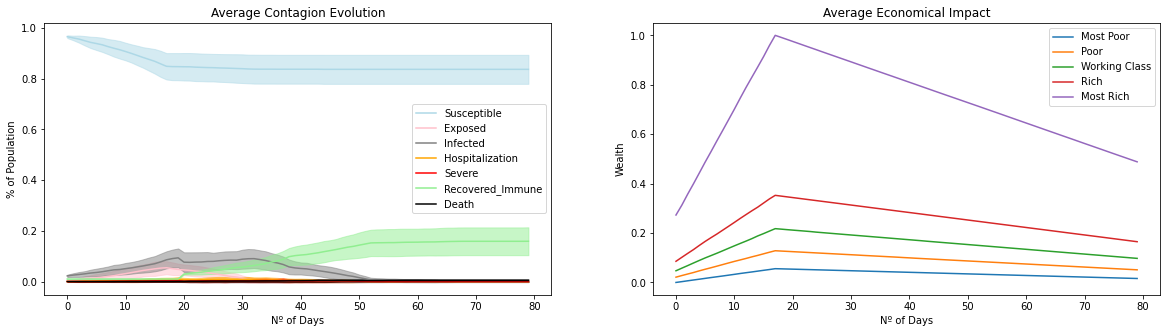

In [3]:
from covid_abs.experiments import plot_batch_results
from covid_abs.experiments import batch_experiment

batch_experiment(50, 80, "scenario1.csv",
                 # Percentage of infected in initial population
                 initial_infected_perc=0.02,
                 # Percentage of immune in initial population
                 initial_immune_perc=0.01,
                 # Length of simulation environment
                 length=200,
                 # Height of simulation environment
                 height=200,
                 # Size of population
                 population_size=100,
                 # Minimal distance between agents for contagion
                 contagion_distance=5.,
                 
                 contagion_rate = 0.5,
                 
                 # Maximum percentage of population which Healthcare System can handle simutaneously
                 critical_limit=0.05,
                 # Mobility ranges for agents, by Status
                 amplitudes={
                             Status.Susceptible :10, 
                            Status.Recovered_Immune : 10, 
                            Status.Infected : 10 ,
                            Status.Exposed : 10
                 },
                 triggers_simulation = [
                     {'condition': lambda a :a.get_iteration() >17,
                      'attribute': 'amplitudes',
                      'action':  lambda a : {                       
                                      Status.Susceptible : 0.5, 
                                      Status.Recovered_Immune : 0.5, 
                                      Status.Infected : 0.5 ,
                                      Status.Exposed : 0.5 
                             }
                     }]
                 )
df = pd.read_csv('scenario1.csv')

plot_batch_results(df)